In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

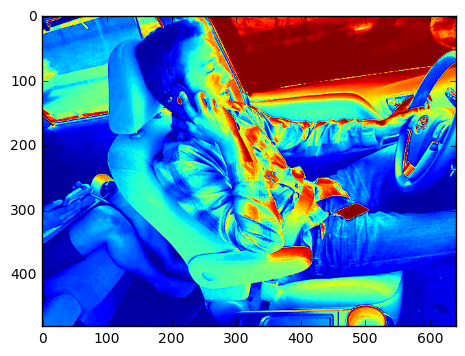

In [4]:
img=cv2.imread("C:/Users/vamsi/Desktop/Resumes/imggg2.jpg",0)
plt.imshow(img)

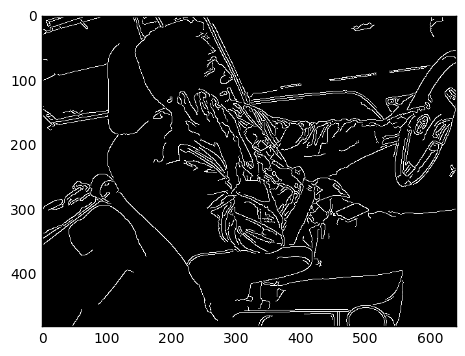

In [5]:
#img = cv2.equalizeHist(img)
img = cv2.GaussianBlur(img,(5,5),0)
#img = cv2.Laplacian(img,cv2.CV_8UC1)
img1= cv2.Canny(img,150,50)
plt.imshow(img1,cmap='gray')

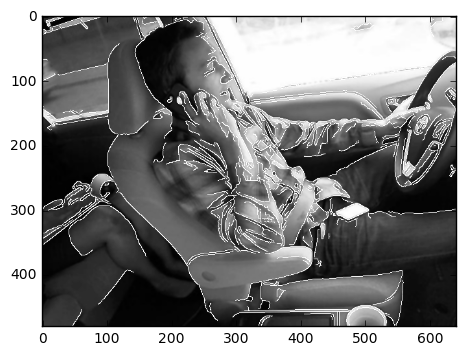

In [6]:
img2=cv2.add(img1,img)
plt.imshow(img2,cmap="gray")

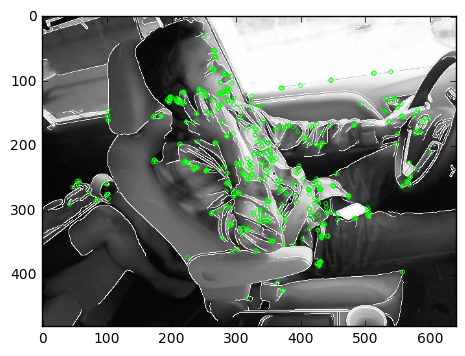

(<matplotlib.image.AxesImage at 0x2048cac2d30>, None)

In [7]:
# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img2,None)
kp = orb.detect(img1,None)

# compute the descriptors with ORB
kp, des = orb.compute(img2, kp)
kp, des = orb.compute(img1, kp)


# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img2,kp,color=(0,255,0),flags=0,outImage=None)
img3 = cv2.drawKeypoints(img1,kp,color=(0,255,0),flags=0,outImage=None)
plt.imshow(img2),plt.show()

In [10]:
imageYCrCb = cv2.cvtColor(img3,cv2.COLOR_GRAY2RGB)

plt.imshow(img3)

error: ..\..\..\modules\imgproc\src\color.cpp:7484: error: (-215) scn == 1 && (dcn == 3 || dcn == 4) in function cv::ipp_cvtColor


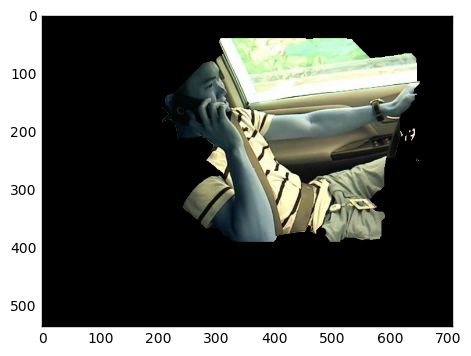

(<matplotlib.image.AxesImage at 0x2048e7bd240>, None)

In [19]:
img=cv2.imread("C:/Users/vamsi/Desktop/Resumes/imggg4.png")
k=img
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (100,40,550,350)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.show()

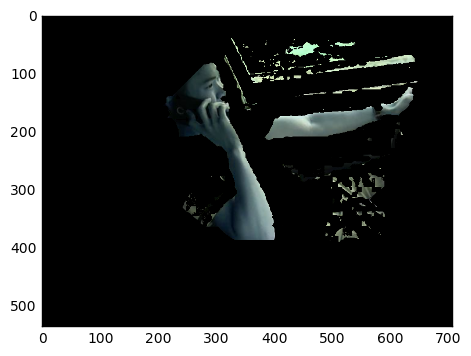

In [27]:
# img=cv2.imread("C:/Users/vamsi/Desktop/Resumes/imggg4.png")
k=img

# Constants for finding range of skin color in YCrCb
min_YCrCb = np.array([0,103,77],np.uint8)
max_YCrCb = np.array([235,183,127],np.uint8)
img=k
imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

# Find region with skin tone in YCrCb image
skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
img = cv2.bitwise_and(img,img,mask=skinRegion)
plt.imshow(img)



In [25]:
import dlib